In [82]:
import pandas as pd
from resizeimage import resizeimage
from PIL import Image
import webcolors
import os
import numpy as np
import statistics as stats
import math
from colorthief import ColorThief
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
def get_avg_color(rgb_list):
    if isinstance(rgb_list[0], list):
        rgb_list = [item for sublist in rgb_list for item in sublist]
    r_list = []
    g_list = []
    b_list = []
    for color in rgb_list:
        r_list.append(color[0])
        g_list.append(color[1])
        b_list.append(color[2])
        avg_r = int(round(stats.mean(r_list),0))
        avg_g = int(round(stats.mean(g_list),0))
        avg_b = int(round(stats.mean(b_list),0))
        return((avg_r, avg_g, avg_b))

In [84]:
def get_pie(hex_colors):
    x = [1/len(hex_colors)]*len(hex_colors)
    plt.pie(x,colors=hex_colors, labels=hex_colors, labeldistance=.4, radius = 2, rotatelabels=True, textprops={"size":'xx-large','color':"w"});
    plt.show()

In [85]:
def read_imgs(folder, files):
    '''input directory name (str) and filenames (list), output {image path: rgb color palette} (dict)'''
    img_dict = {}
    for file in files:
        try:
            img_path = os.path.join(folder+ file)
            rgb_palette = ColorThief(img_path).get_palette(color_count=6, quality=10)
            img_dict[img_path] = (rgb_palette, get_avg_color(rgb_palette))
        except:
            pass
    return(img_dict)

In [86]:
def display_colors(img_dict):
    for img_path in img_dict.keys():
        display(Image.open(img_path, 'r'))
        rgb_palette = img_dict[img_path][0]
        if isinstance(rgb_palette, list):
            hex_palette =[webcolors.rgb_to_hex(rgb) for rgb in rgb_palette]
        else:
            hex_palette = webcolors.rgb_to_hex(rgb_palette)
        get_pie(hex_palette)
        

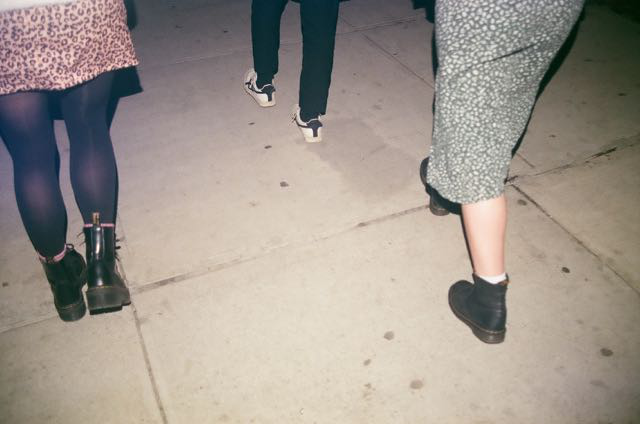

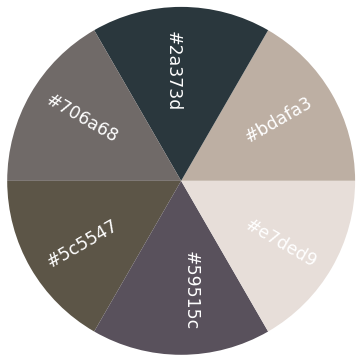

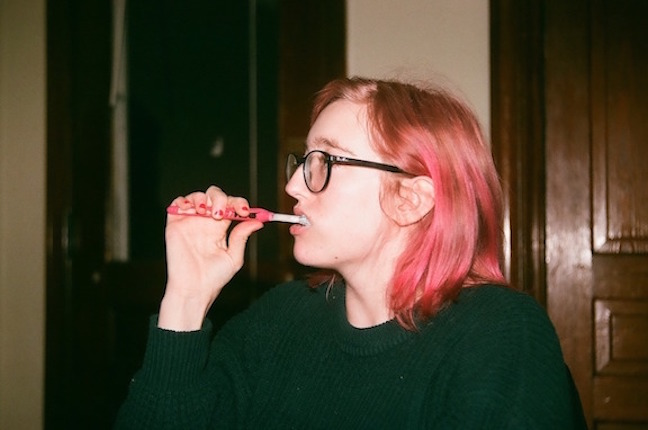

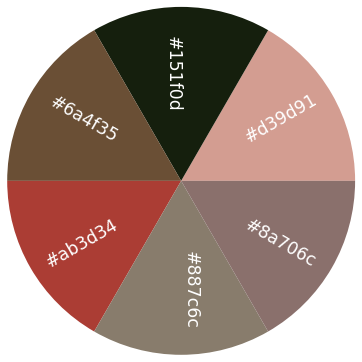

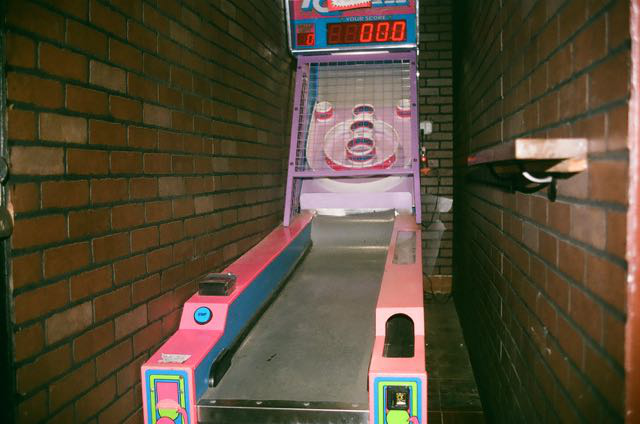

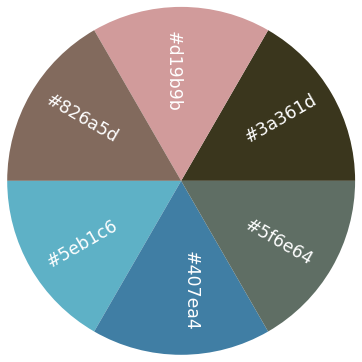

In [44]:
stock_dict=[]
stock_files=[]
img_dict = {}

stock_files = os.listdir('images/')
stock_dict = read_imgs('images/',stock_files)
display_colors(stock_dict)

# Denim Popularity Data

In [45]:
img_dict ={}
img_files = os.listdir('denim/')
img_dict = read_imgs('denim/',img_files)

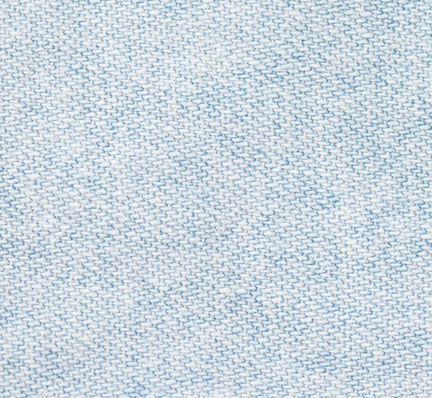

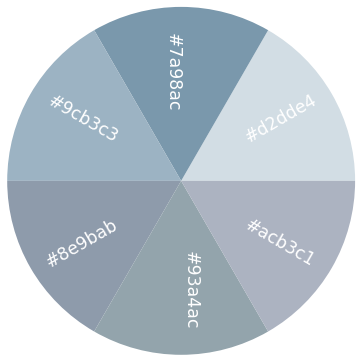

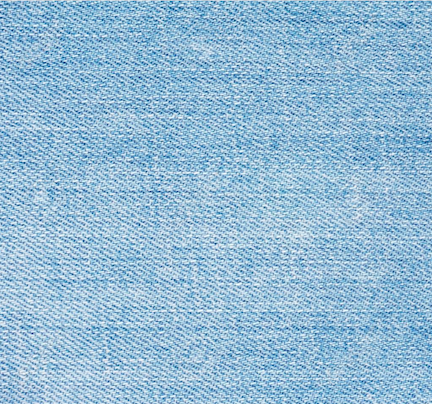

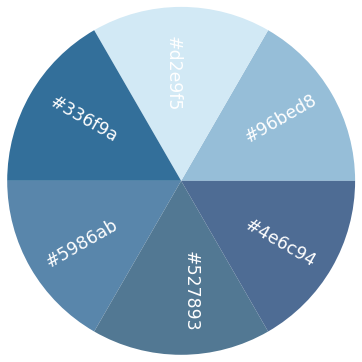

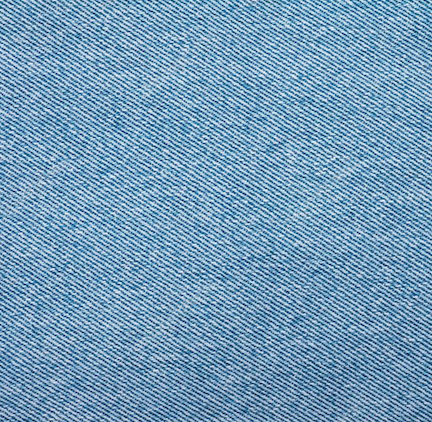

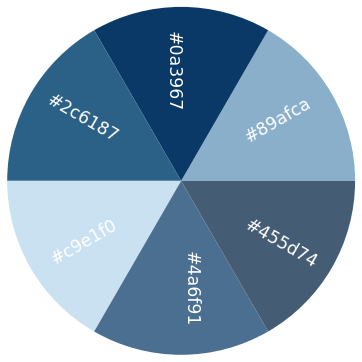

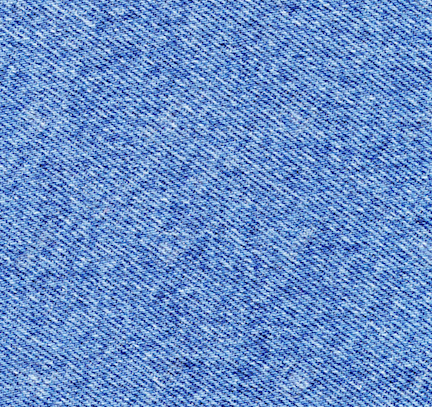

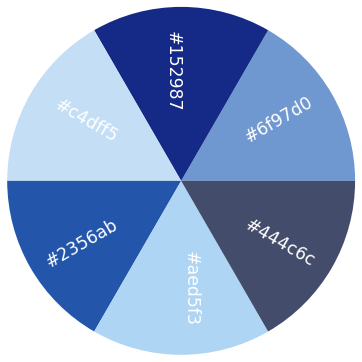

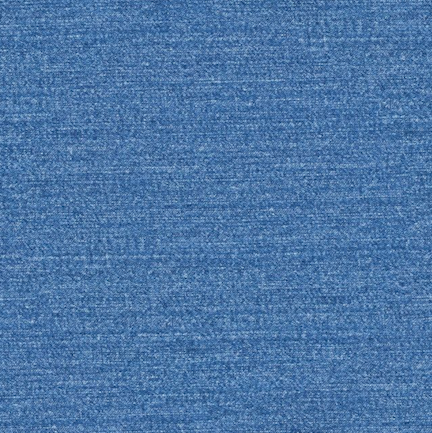

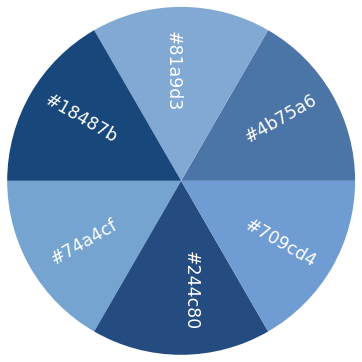

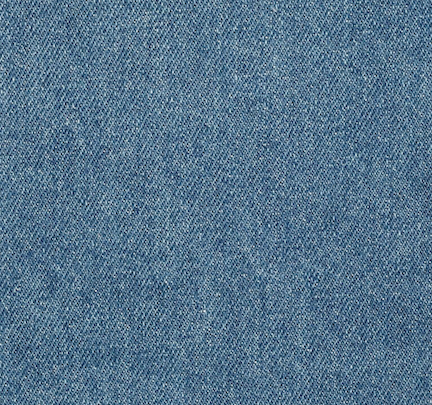

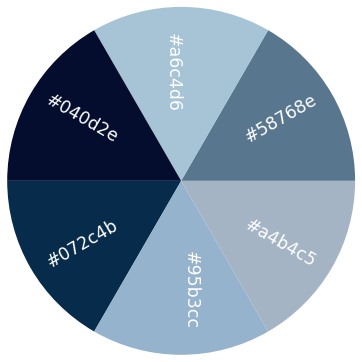

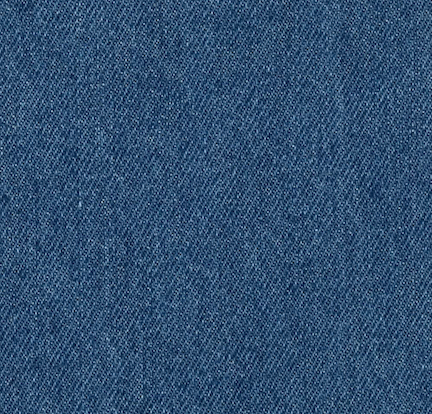

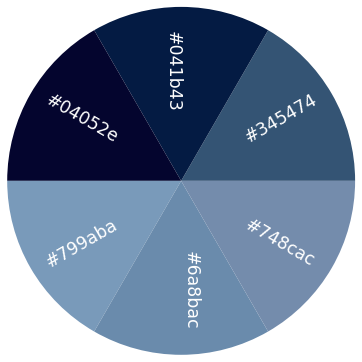

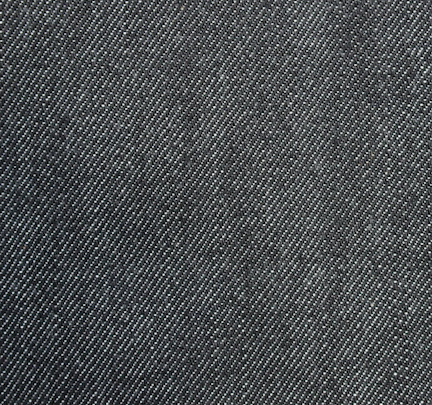

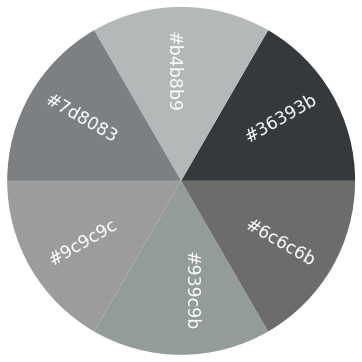

In [29]:
display_colors(img_dict)

In [87]:
df = pd.read_csv('Denim Survey.csv')
df.rename(columns={'What is your age?': 'age', 'What is your favorite shade of denim to WEAR?':'shade', 'What state do you currently live in? (where you usually live/work/pay rent etc)':'state'}, inplace=True)
df.head()


Timestamp    age     shade     state
0  2020/10/24 2:52:17 PM AST  18-22  Option 7  Michigan
1  2020/10/24 2:52:18 PM AST  23-29  Option 6  Michigan
2  2020/10/24 2:58:21 PM AST  23-29  Option 4  Michigan
3  2020/10/24 3:01:32 PM AST  23-29  Option 7  Michigan
4  2020/10/24 3:04:22 PM AST  18-22  Option 8  Michigan

In [88]:
conditions =[
    df['shade'] == 'Option 1',
    df['shade'] == 'Option 2',
    df['shade'] == 'Option 3',
    df['shade'] == 'Option 4',
    df['shade'] == 'Option 5',
    df['shade'] == 'Option 6',
    df['shade'] == 'Option 7',
    df['shade'] == 'Option 8'
]
choices =[
    img_dict['denim/option1.png'][1][0],
    img_dict['denim/option2.png'][1][0],
    img_dict['denim/option3.png'][1][0],
    img_dict['denim/option4.png'][1][0],
    img_dict['denim/option5.png'][1][0],
    img_dict['denim/option6.png'][1][0],
    img_dict['denim/option7.png'][1][0],
    img_dict['denim/option8.png'][1][0]
]

df['r'] = np.select(conditions, choices, default='na')
df.r = df.r.astype(int)

In [89]:
conditions =[
    df['shade'] == 'Option 1',
    df['shade'] == 'Option 2',
    df['shade'] == 'Option 3',
    df['shade'] == 'Option 4',
    df['shade'] == 'Option 5',
    df['shade'] == 'Option 6',
    df['shade'] == 'Option 7',
    df['shade'] == 'Option 8'
]
choices =[
    img_dict['denim/option1.png'][1][1],
    img_dict['denim/option2.png'][1][1],
    img_dict['denim/option3.png'][1][1],
    img_dict['denim/option4.png'][1][1],
    img_dict['denim/option5.png'][1][1],
    img_dict['denim/option6.png'][1][1],
    img_dict['denim/option7.png'][1][1],
    img_dict['denim/option8.png'][1][1]
]

df['g'] = np.select(conditions, choices, default='na')
df.g = df.g.astype(int)

In [90]:
conditions =[
    df['shade'] == 'Option 1',
    df['shade'] == 'Option 2',
    df['shade'] == 'Option 3',
    df['shade'] == 'Option 4',
    df['shade'] == 'Option 5',
    df['shade'] == 'Option 6',
    df['shade'] == 'Option 7',
    df['shade'] == 'Option 8'
]
choices =[
    img_dict['denim/option1.png'][1][2],
    img_dict['denim/option2.png'][1][2],
    img_dict['denim/option3.png'][1][2],
    img_dict['denim/option4.png'][1][2],
    img_dict['denim/option5.png'][1][2],
    img_dict['denim/option6.png'][1][2],
    img_dict['denim/option7.png'][1][2],
    img_dict['denim/option8.png'][1][2]
]

df['b'] = np.select(conditions, choices, default='na')
df.b = df.b.astype(int)
df.head()

Timestamp    age     shade     state    r    g    b
0  2020/10/24 2:52:17 PM AST  18-22  Option 7  Michigan   52   84  116
1  2020/10/24 2:52:18 PM AST  23-29  Option 6  Michigan   88  118  142
2  2020/10/24 2:58:21 PM AST  23-29  Option 4  Michigan  111  151  208
3  2020/10/24 3:01:32 PM AST  23-29  Option 7  Michigan   52   84  116
4  2020/10/24 3:04:22 PM AST  18-22  Option 8  Michigan   54   57   59

In [91]:
grouped = df.groupby(['state'])['r', 'g', 'b'].mean()
grouped.r = grouped.r.astype(int)
grouped.g = grouped.g.astype(int)
grouped.b = grouped.b.astype(int)

/Users/Khyatee/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [92]:
grouped.head()

r    g    b
state                    
Alabama      54   57   59
California   99  126  147
Colorado     52   84  116
Connecticut  61   85  108
Florida      70   94  114

In [93]:
rgb_state = list(zip(grouped.r, grouped.g, grouped.b))
grouped['hex'] = [webcolors.rgb_to_hex(rgb) for rgb in rgb_state]
grouped.head()

r    g    b      hex
state                             
Alabama      54   57   59  #36393b
California   99  126  147  #637e93
Colorado     52   84  116  #345474
Connecticut  61   85  108  #3d556c
Florida      70   94  114  #465e72

# Make the Map

In [120]:
import geopandas as gpd
shape = gpd.GeoDataFrame.from_file('state_shapefile/cb_2018_us_state_5m.shp')
gdf = shape.merge(grouped, how='left',right_on='state',left_on='NAME')
gdf.fillna("#FFFFFF", inplace=True)
gdf.sample(3)

STATEFP   STATENS     AFFGEOID GEOID STUSPS         NAME LSAD  \
27      15  01779782  0400000US15    15     HI       Hawaii   00   
51      72  01779808  0400000US72    72     PR  Puerto Rico   00   
21      16  01779783  0400000US16    16     ID        Idaho   00   

           ALAND       AWATER  \
27   16633990195  11777809026   
51    8868896030   4922382562   
21  214049787659   2391722557   

                                             geometry        r        g  \
27  MULTIPOLYGON (((-156.05722 19.74254, -156.0523...  #FFFFFF  #FFFFFF   
51  MULTIPOLYGON (((-65.33750 18.34834, -65.33570 ...  #FFFFFF  #FFFFFF   
21  POLYGON ((-117.24267 44.39655, -117.23484 44.3...  #FFFFFF  #FFFFFF   

          b      hex  
27  #FFFFFF  #FFFFFF  
51  #FFFFFF  #FFFFFF  
21  #FFFFFF  #FFFFFF

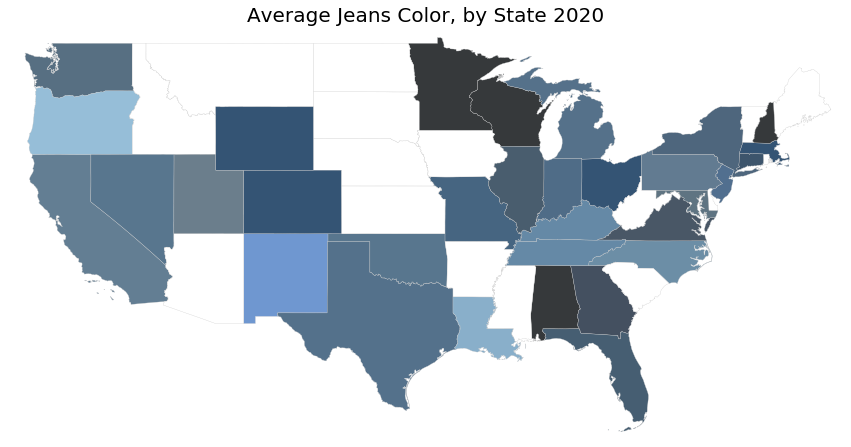

In [126]:
ax = gdf.plot(figsize=(15,15), color=gdf['hex'], linewidth=0.3, edgecolor='0.8')
ax.set(xlim=(-126, -66), ylim=(24, 50));
ax.axis('off');
plt.title(label='Average Jeans Color, by State 2020',fontsize=20);
